# Notebook - Marginalisation & Einsum

Dr Moody Alam:


>[1 🎲 Probability Distributions for Two Fair Dice](#scrollTo=E7S95N99yuLN)

>>[Joint Probability $P_{X,Y}(x, y)$](#scrollTo=aXGFAWkjqOcX)

>>[Conditional Probability $P_{Y \mid X}(y \mid x)$](#scrollTo=rNBi8ldlsQPm)

>>[Marginal Distributions](#scrollTo=7WkhbUQMtfNK)

>>[Distribution of the Sum $P_Z(z)$](#scrollTo=L-GA-iKzm7ny)

>[2 Beyond two dice: Using a General Probability Distribution](#scrollTo=VQ5pGRYGM702)

>[3 Einsum - The "Magical" way of marginalisation](#scrollTo=N028Gg9FbS2z)



### 1 🎲 Probability Distributions for Two Fair Dice

Let:

- $X$ be the outcome of the **first dice**, $P_X$ be the probability distribution over $X$, and $P_X(x)$ be the probability that the first die shows value $x$. Since $x \in \{1,\dots,6\}$, we have:
  $$
  P_X(x) = \frac{1}{6} \approx 0.167
  $$

- $Y$ be the outcome of the **second dice**, $P_Y$ be the probability distribution over $Y$, and $P_Y(y)$ be the probability that the second die shows value $y$. Since $y \in \{1,\dots,6\}$, similarly:
  $$
  P_Y(y) = \frac{1}{6} \approx 0.167
  $$

- $Z = X + Y$ be the **sum** of the two dice and $P_Z$ be the distribution of the sum

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#This is to print out the matrix nicely
from sympy import Matrix, init_printing, symbols, Eq, latex
from IPython.display import display, Math
init_printing()


# Define values of X and Y
X = np.arange(1,7)
Y = np.arange(1,7)

# Define X,Y distributions (uniform for fair dice)
P_X = np.full(len(X), 1/6)
P_Y = np.full(len(Y), 1/6)

# Feel free to skip over it, just a way to convert to LaTeX, label the matrices and print them out properly
latex_expr = (r"X = " + latex(Matrix(X)) + r"\quad\quad Y = " + latex(Matrix(X)) + r"\quad\quad P_X(x) =" + latex(Matrix(P_X).evalf(3)) + r"\quad\quad P_Y(y) =" + latex(Matrix(P_Y).evalf(3)))

display(Math(latex_expr))


<IPython.core.display.Math object>



---

#### 1. [Joint Probability](https://en.wikipedia.org/wiki/Joint_probability_distribution) $P_{X,Y}(x, y)$

The **joint probability** is the probability of both dice showing specific values $x$ and $y$.  
For fair and independent dice:

$$
P_{X,Y}(x, y) = P_X(x) \cdot P_Y(y) = \frac{1}{6} \cdot \frac{1}{6} = \frac{1}{36} \approx 0.028
$$

This applies for all $ x, y \in \{1, 2, 3, 4, 5, 6\}$.

We can represent this in a **6 × 6 matrix**, where:

- **Rows** index values of $X$
- **Columns** index values of $Y$

Each entry is $\frac{1}{36} \approx 0.028 $:

$$
\begin{array}{c|cccccc}
P_{X,Y}(x, y) & Y=1 & Y=2 & Y=3 & Y=4 & Y=5 & Y=6 \\
\hline
X=1 & 0.028 & 0.028 & 0.028 & 0.028 & 0.028 & 0.028 \\
X=2 & 0.028 & 0.028 & 0.028 & 0.028 & 0.028 & 0.028 \\
X=3 & 0.028 & 0.028 & 0.028 & 0.028 & 0.028 & 0.028 \\
X=4 & 0.028 & 0.028 & 0.028 & 0.028 & 0.028 & 0.028 \\
X=5 & 0.028 & 0.028 & 0.028 & 0.028 & 0.028 & 0.028 \\
X=6 & 0.028 & 0.028 & 0.028 & 0.028 & 0.028 & 0.028 \\
\end{array}
$$

This matrix shows all \(36\) outcomes of two dice rolls, each equally likely. This means the joiny distribution of $P_{X,Y}(x, y)$ is **uniform** — because the dice are independent.

In [2]:
# 1. Construct joint distribution: P(X,Y) = P(X) * P(Y) assuming independence
joint = np.zeros((len(X), len(Y)))
for i, x in enumerate(X):
    for j, y in enumerate(Y):
        joint[i][j] = P_X[i] * P_Y[j]  # since independent: P(x,y) = P(x) * P(y)



#to print out the matrix nicely
display(Math(r"\text{Joint Probability: }P_{X,Y}(x,y) = " + latex(Matrix(joint).evalf(3))))


<IPython.core.display.Math object>

#### 2. [Conditional Probability](https://en.wikipedia.org/wiki/Conditional_probability) $P_{Y \mid X}(y \mid x)$

If we know the first die rolled a 2 (i.e. $X = 2$), we can compute the **conditional probability** of the second die taking on different values using the joint distribution.

The definition is:

$$
P(A \text{ and } B) = P(B|A) ⋅ P(A) \quad OR \quad P(B|A)  = \frac{P(A \text{ and } B)}{P(A)}
$$

More formally:

$$
P_{Y \mid X}(y \mid x) = \frac{P_{X,Y}(x, y)}{P_X(x)}
$$

In our case, conditioning on $X = 2$:

$$
P_{Y \mid X}(y \mid 2) = \frac{P_{X,Y}(2, y)}{P_X(2)}
$$

This is computed by:

- Taking **row 2** of the joint matrix (all values of $y$ where $x = 2$)
- Dividing each entry by the marginal probability $P_X(2)$ (i.e., the total of that row)

Since the dice are fair, $P_X(2) = \frac{1}{6}$, and each joint entry in that row is $\frac{1}{36}$. Therefore:

$$
P_{Y \mid X}(y \mid 2) = \frac{\frac{1}{36}}{\frac{1}{6}} = \frac{1}{6} \approx 0.167
$$

This means the conditional distribution of $Y$ given $X = 2$ is **uniform**, just like the marginal — because the dice are independent.

---

In [3]:
# 2. Conditional probability: P(Y | X = 2)

#let that the first dice rolled to number 2
x_val = 2
# Get the index of number 2
x_index = x_val - 1
# Get all the probabilities of y for the row where x=2 (i.e. numberator in the above equation)
row = joint[x_index]
# divide the probablity of each outcome (y) by the sum of row where x=2 (i.e. denomerator in the above equation)
P_Y_given_X2 = row / row.sum()


#to print out the matrix nicely
display(Math(r"\text{Conditional Probability: }P_{Y|X}(y,x=2) = " + latex(Matrix(P_Y_given_X2).evalf(3))))

<IPython.core.display.Math object>

#### 3. [Marginal Distributions](https://en.wikipedia.org/wiki/Marginal_distribution)

The **marginal distribution** describes the probability of a single variable, regardless of the value of the other.

Given a joint distribution $P_{X,Y}(x, y)$, the marginal distributions are defined as:


$$ \text{The } \textbf{marginal distribution} \text{ of } Y =
  P_Y(y) = \sum_x P_{X,Y}(x, y)
$$

$$ \text{The } \textbf{marginal distribution} \text{ of } X =
  P_X(x) = \sum_y P_{X,Y}(x, y)
  $$

This is called **marginalisation** — summing out the other variable.


Matrix Interpretation:

- $P_X(x)$: sum over each **row** of the joint table  
- $P_Y(y)$: sum over each **column** of the joint table


Note that using the [Law of Total Probability](https://en.wikipedia.org/wiki/Law_of_total_probability), we can also express marginals using conditionals:

  $$
  P_Y(y) = \sum_x P_{X,Y}(x, y) = \sum_x P_X(x) \cdot P_{Y|X}(y \mid x)
  $$


  $$
  P_X(x) = \sum_y P_{X,Y}(x, y) = \sum_y P_Y(y) \cdot P_{X|Y}(x \mid y)
  $$

This shows how **marginal distributions** can be obtained by averaging over **conditional probabilities**, weighted by the probability of the conditioning variable.

In [4]:
# 3. Calculating Marginal distributions
P_Y = joint.sum(axis=0)  # sum across rows    → shape (6,)
P_X = joint.sum(axis=1)  # sum across columns → shape (6,)


# Create joint matrix with marginals
# We'll append row totals to the joint, and a final column for column totals
joint_with_margins = np.zeros((7, 7))  # 6x6 joint + 1 row + 1 column
# Fill the 6x6 joint
joint_with_margins[:6, :6] = joint
# Fill row marginals (P_X) in last column
joint_with_margins[:6, 6] = P_X
# Fill column marginals (P_Y) in last row
joint_with_margins[6, :6] = P_Y
# Grand total in bottom-right cell (should be 1.0)
joint_with_margins[6, 6] = joint.sum()

# Display joint matrix with marginals
display(Math(r"\textbf{Joint Probability Matrix with Marginals:}"))

# Create LaTeX table manually
rows = []
for i in range(6):
    row = " & ".join([f"{joint_with_margins[i,j]:.3f}" for j in range(7)])
    rows.append(f"X={i+1} & {row} \\\\")

# Add last row (P_Y)
last_row = " & ".join([f"{joint_with_margins[6,j]:.3f}" for j in range(7)])
rows.append(f"P_Y(y) & {last_row} \\\\")

joint_table = r"""
\begin{array}{c|cccccc|c}
 & Y=1 & Y=2 & Y=3 & Y=4 & Y=5 & Y=6 & P_X(x) \\
\hline
""" + "\n".join(rows) + r"""
\end{array}
"""
#print out joint table with marginals
display(Math(joint_table))
print("\n\n")

#to print out the matrix nicely
display(Math(r"\text{Marginal Probability: }P_Y(y) = \sum_x P_{X,Y}(x, y) = " + latex(Matrix(P_Y).evalf(3)) +
             r"\quad\quad \text{Marginal Probability: }P_X(x) = \sum_y P_{X,Y}(x, y) = " + latex(Matrix(P_X).evalf(3))
             ))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>



---

#### 4. [Distribution of the Sum](https://en.wikipedia.org/wiki/Probability_distribution) $P_Z(z)$



To find the probability distribution of $Z$, we marginalise over all combinations of $x$ and $y$ that sum to $z$:


$$
P_Z(z) = \sum_{x=1}^{6} \sum_{y=1}^{6} (x + y) \cdot P_{X,Y}(x, y)
$$

This means:

- For each possible value of $z \in \{2, 3, \dots, 12\}$  
- We **sum the joint probabilities** $P_{X,Y}(x, y)$ where $x + y = z$

This is another example of **marginalisation**, where we sum out the variables we’re not interested in (here: $x$ and $y$), to focus on the derived variable $z$.

Because of symmetry and overlap in outcomes, the distribution $P_Z(z)$ is **not uniform**, unlike $P_X(x)$ or $P_Y(y)$.

For example:

- $P_Z(7)$ is the highest, since there are **6 pairs** that sum to 7:  
  $(1,6), (2,5), (3,4), (4,3), (5,2), (6,1)$

- $P_Z(2)$ and $P_Z(12)$ are the lowest, with only **1 combination** each.



In [5]:

# 4. Distribution of sum Z = X + Y
P_Z = np.zeros(11)  # Z = 2..12 → index 0..10
# We loop over the rows and columns and sum up their probabilities as in the above equation
for i in range(6):
    for j in range(6):
        z = (i + 1) + (j + 1)
        P_Z[z - 2] += joint[i, j]

display(Math(r"\text{Distribution of the Sum: } P_Z(z) = \sum_{x=1}^{6} \sum_{y=1}^{6} (x + y) \cdot P_{X,Y}(x, y) = " + latex(Matrix(P_Z).evalf(3))))


<IPython.core.display.Math object>

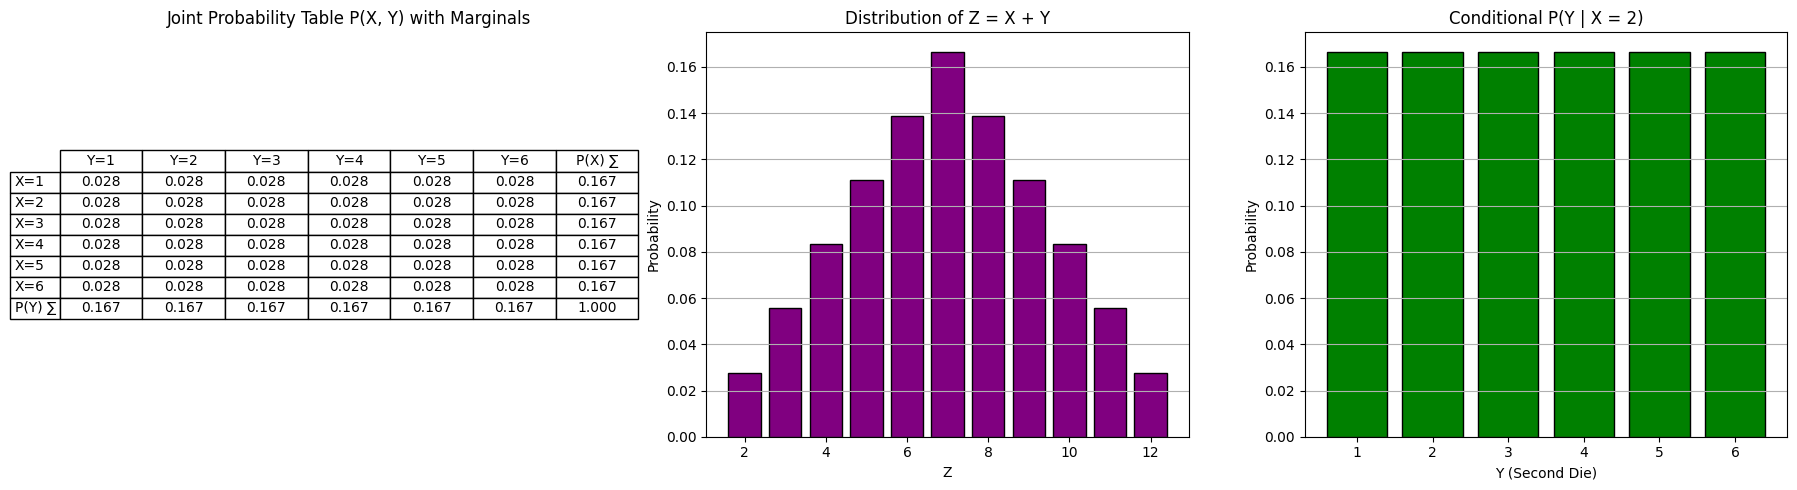

In [6]:
# ========== PLOTS ========== #
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# --- Plot 1: Joint table with values (and P(X), P(Y) as margins)
axes[0].axis('off')
axes[0].set_title('Joint Probability Table P(X, Y) with Marginals')
joint_data = [[f"{joint[i][j]:.3f}" for j in range(6)] + [f"{P_X[i]:.3f}"] for i in range(6)]
joint_data.append([f"{P_Y[j]:.3f}" for j in range(6)] + ["1.000"])
row_labels = [f"X={i+1}" for i in range(6)] + ["P(Y) ∑"]
col_labels = [f"Y={j+1}" for j in range(6)] + ["P(X) ∑"]
axes[0].table(cellText=joint_data,
              rowLabels=row_labels,
              colLabels=col_labels,
              cellLoc='center',
              loc='center').scale(1.2, 1.2)

# --- Plot 2: Bar plot of P(Z)
z_vals = np.arange(2, 13)
axes[1].bar(z_vals, P_Z, color='purple', edgecolor='black')
axes[1].set_title('Distribution of Z = X + Y')
axes[1].set_xlabel('Z')
axes[1].set_ylabel('Probability')
axes[1].grid(True, axis='y')

# --- Plot 3: Conditional P(Y | X = 2)
axes[2].bar(np.arange(1, 7), P_Y_given_X2, color='green', edgecolor='black')
axes[2].set_title('Conditional P(Y | X = 2)')
axes[2].set_xlabel('Y (Second Die)')
axes[2].set_ylabel('Probability')
axes[2].grid(True, axis='y')

plt.tight_layout()
plt.show()

### 2 Beyond two dice: Using a General Probability Distribution

Imagine we have a joint pdf, $P(a, b, c, d)$ that factorises as:

$$P(a, b, c, d) = P(a|b) \cdot P(b|c) \cdot P(c|d) \cdot P(d)$$

We assume that all probabilities are discrete for simplification.
 * $a$ has 4 outcomes
 * $b$ has 3 outcomes
 * $c$ has 2 outcomes
 * $d$ has 5 outcomes


In [7]:
import numpy

# Distributions...

# P(d)
Pd = numpy.array([ 0.1, 0.1, 0.2, 0.5, 0.1])

# P(c|d)
Pc_d = numpy.array([[0.8, 0.5, 0.1, 0.7, 0.2],
                    [0.2, 0.5, 0.9, 0.3, 0.8]])
# P(b|c)
Pb_c = numpy.array([[0.1, 0.3],
                    [0.6, 0.3],
                    [0.3, 0.4]]) #
# P(a|b)
Pa_b = numpy.array([[0.2, 0.7, 0.3],
                    [0.3, 0.1, 0.3],
                    [0.1, 0.1, 0.1],
                    [0.4, 0.1, 0.3]])

display(Math(r" P(a|b) =  " + latex(Matrix(Pa_b).evalf(3)) + r"\quad\quad P(b|c) = " + latex(Matrix(Pb_c).evalf(3)) + r"\quad\quad P(c|d) = "
             + latex(Matrix(Pc_d).evalf(3)) + r"\quad\quad P(d) = " + latex(Matrix(Pd).evalf(3))))


<IPython.core.display.Math object>



We know that the conditional probability $P(y|x)$ could be computed as:


$$P(C,D) = P(C|D) \cdot P(D) \quad\text{OR} \quad P(C|D) = \frac{P(C,D)}{P(D)} $$

Therefore,

$$P(a, b, c, d) = P(a|b) \cdot P(b|c) \cdot P(c|d) \cdot P(d) = \frac{P(a,b)}{P(b)} \cdot \frac{P(b,c)}{P(c)} \cdot \frac{P(c,d)}{P(d)} = \frac{P(a,b)}{P(b)} \cdot \frac{P(b,c)}{P(c)} \cdot P(c,d)$$

We can calculate the joint probability $P(a, b, c, d)$ by matrix multiplication and marginalisation (summation over a given variable) as below.

First we calculate the $P(c,d)$ by multiplying $P(c|d)$ with $P(d)$. We then calculate $P(c) $ by marginalising out $P(d)$

In [8]:
# Explicit and efficient way...

# Calculate P(c, d)...
Pcd = Pc_d * Pd

# Calculate P(c)... (i.e marginalising out d)
Pc = Pcd.sum(axis=1)

display(Math(r" P(c,d) = P(c|d) \cdot P(d) = " + latex(Matrix(Pcd).evalf(3))))
display(Math(r" P(c) = " + latex(Matrix(Pc).evalf(3))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Now we calculate the $P(b,c)$ by multiplying $P(b|c)$ with $P(c)$. We then calculate $P(b) $ by marginalising out $P(c)$



In [9]:

# Calculate P(b, c)...
Pbc = Pb_c * Pc

# Calculate P(b)... (i.e marginalising out c)
Pb = Pbc.sum(axis=1)

display(Math(r" P(b,c) = P(b|c) \cdot P(c) = " + latex(Matrix(Pbc).evalf(3))))
display(Math(r" P(b) = " + latex(Matrix(Pb).evalf(3))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Finally, we calculate the $P(a,b)$ by multiplying $P(a|b)$ with $P(b)$. We then calculate $P(a) $ by marginalising out $P(b)$

In [10]:

# Calculate P(a,b)...
Pab = Pa_b * Pb

# Calcukate P(a)... (i.e marginalising out b)
Pa = Pab.sum(axis=1)

display(Math(r" P(a,b) = P(a|b) \cdot P(b) = " + latex(Matrix(Pab).evalf(3))))
display(Math(r" P(a) = " + latex(Matrix(Pa).evalf(3))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 3 Einsum - The "Magical" way of marginalisation

In [11]:
# Using einsum ..
Pa = numpy.einsum('ab,bc,cd,d->a',Pa_b,Pb_c,Pc_d,Pd)
display(Math(r" P(a) = " + latex(Matrix(Pa).evalf(3))))

<IPython.core.display.Math object>